<a href="https://colab.research.google.com/github/sardarmonsoorsait/Crossroad/blob/master/asaiTech_predictfuturesales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path ='/content/drive/My Drive/predictfuturesales/sales_train.csv'
df_sale = pd.read_csv(path)
path_1 = '/content/drive/My Drive/predictfuturesales/item_categories.csv'
df_item_catagories =pd.read_csv(path_1)
path_2 = '/content/drive/My Drive/predictfuturesales/items.csv'
df_item = pd.read_csv(path_2)
path_3 = '/content/drive/My Drive/predictfuturesales/shops.csv'
df_shops = pd.read_csv(path_3)
path_test = '/content/drive/My Drive/predictfuturesales/test.csv'
df_test = pd.read_csv(path_test)

In [ ]:
df_sales = df_sale.copy()

In [ ]:
df_item_catagories

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4
...,...,...
79,Служебные,79
80,Служебные - Билеты,80
81,Чистые носители (шпиль),81
82,Чистые носители (штучные),82


In [ ]:
df_item

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [ ]:
df_shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [ ]:
df_sales = df_sales.join(df_item,on='item_id',rsuffix='_').join(df_shops,on='shop_id',rsuffix='_').join(df_item_catagories,on='item_category_id',rsuffix="_")

In [ ]:
df_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_id_,item_category_id,shop_name,shop_id_,item_category_name,item_category_id_
0,02.01.2013,0,59,22154,999.00,1.0,ЯВЛЕНИЕ 2012 (BD),22154,37,"Ярославль ТЦ ""Альтаир""",59,Кино - Blu-Ray,37
1,03.01.2013,0,25,2552,899.00,1.0,DEEP PURPLE The House Of Blue Light LP,2552,58,"Москва ТРК ""Атриум""",25,Музыка - Винил,58
2,05.01.2013,0,25,2552,899.00,-1.0,DEEP PURPLE The House Of Blue Light LP,2552,58,"Москва ТРК ""Атриум""",25,Музыка - Винил,58
3,06.01.2013,0,25,2554,1709.05,1.0,DEEP PURPLE Who Do You Think We Are LP,2554,58,"Москва ТРК ""Атриум""",25,Музыка - Винил,58
4,15.01.2013,0,25,2555,1099.00,1.0,DEEP PURPLE 30 Very Best Of 2CD (Фирм.),2555,56,"Москва ТРК ""Атриум""",25,Музыка - CD фирменного производства,56


In [ ]:
df_sales.drop(['shop_id_','item_category_id_','item_id_'],axis=1,inplace=True)

In [ ]:
df_sales.keys()

Index(['date', 'date_block_num', 'shop_id', 'item_id', 'item_price',
       'item_cnt_day', 'item_name', 'item_category_id', 'shop_name',
       'item_category_name'],
      dtype='object')

In [ ]:
df_sales.dtypes

date                   object
date_block_num          int64
shop_id                 int64
item_id                 int64
item_price            float64
item_cnt_day          float64
item_name              object
item_category_id        int64
shop_name              object
item_category_name     object
dtype: object

In [ ]:
df_sales.shape

(2935849, 10)

In [ ]:
df_sales.describe()

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
count,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06,2.935849e+06
mean,1.456991e+01,3.300173e+01,1.019723e+04,8.908532e+02,1.242641e+00,4.000138e+01
std,9.422988e+00,1.622697e+01,6.324297e+03,1.729800e+03,2.618834e+00,1.710076e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,-2.200000e+01,0.000000e+00
25%,7.000000e+00,2.200000e+01,4.476000e+03,2.490000e+02,1.000000e+00,2.800000e+01
50%,1.400000e+01,3.100000e+01,9.343000e+03,3.990000e+02,1.000000e+00,4.000000e+01
75%,2.300000e+01,4.700000e+01,1.568400e+04,9.990000e+02,1.000000e+00,5.500000e+01
max,3.300000e+01,5.900000e+01,2.216900e+04,3.079800e+05,2.169000e+03,8.300000e+01


In [ ]:
df_sales['date_block_num'].value_counts()

11    143246
23    130786
2     121347
0     115690
1     108613
7     104772
6     100548
5     100403
12     99349
10     96736
8      96137
9      94202
3      94109
14     92733
4      91759
13     89830
24     88522
19     86614
22     86428
17     82408
21     79361
18     78760
16     78529
15     77906
20     73157
25     71808
26     69977
31     57029
27     56274
30     55549
29     54617
28     54548
33     53514
32     50588
Name: date_block_num, dtype: int64

In [ ]:
df_sales['shop_id'].value_counts()

31    235636
25    186104
54    143480
28    142234
57    117428
42    109253
27    105366
6      82663
58     71441
56     69573
46     66321
50     65173
19     63911
15     59511
35     58445
21     58133
7      58076
47     56695
26     53910
18     53227
24     53032
53     52921
16     52734
30     50860
29     49225
38     46013
22     45434
51     44433
52     43502
59     42108
41     41967
37     39638
44     39530
43     39282
4      38242
5      38179
14     36979
45     35891
55     34769
12     34694
2      25991
3      25532
17     22950
48     21612
10     21397
13     17824
49     15849
39     13440
0       9857
32      7947
23      6963
34      5752
1       5678
33      5027
40      4257
9       3751
8       3412
20      1792
11       499
36       306
Name: shop_id, dtype: int64

In [ ]:
df_sales['date_block_num'].nunique()

34

In [ ]:
df_sales['date_block_num'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33])

In [ ]:
df_sales[df_sales['item_price']<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
484683,15.05.2013,4,32,2973,-1.0,1.0,"DmC Devil May Cry [PS3, русские субтитры]",19,"Москва ТЦ ""Серебряный Дом""",Игры - PS3


In [ ]:
df_sales[df_sales['item_cnt_day']<0]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,shop_name,item_category_name
2,05.01.2013,0,25,2552,899.0,-1.0,DEEP PURPLE The House Of Blue Light LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
148,23.01.2013,0,25,2321,999.0,-1.0,Call of Duty: Black Ops II. Расширенное издани...,28,"Москва ТРК ""Атриум""",Игры PC - Дополнительные издания
175,07.01.2013,0,25,2199,1449.0,-1.0,COLDPLAY Mylo Xyloto LP,58,"Москва ТРК ""Атриум""",Музыка - Винил
807,02.01.2013,0,25,2330,599.0,-1.0,"Call of Duty: Black Ops [PC, Jewel, русская ве...",30,"Москва ТРК ""Атриум""",Игры PC - Стандартные издания
1041,13.01.2013,0,25,5034,1989.0,-1.0,"NHL 13 [Xbox 360, русская документация]",23,"Москва ТРК ""Атриум""",Игры - XBOX 360
...,...,...,...,...,...,...,...,...,...,...
2934243,26.10.2015,33,25,3917,449.0,-1.0,IRON MAIDEN The Book Of Souls 2CD,55,"Москва ТРК ""Атриум""",Музыка - CD локального производства
2934462,18.10.2015,33,25,4896,6398.0,-1.0,"Mortal Kombat X. Kollector's Edition [PS4, рус...",20,"Москва ТРК ""Атриум""",Игры - PS4
2935263,05.10.2015,33,25,10039,249.0,-1.0,ВОССТАНИЕ ПЛАНЕТЫ ОБЕЗЬЯН (BD),37,"Москва ТРК ""Атриум""",Кино - Blu-Ray
2935643,16.10.2015,33,25,7893,2990.0,-1.0,X360: Геймпад беспроводной черный - Wireless C...,6,"Москва ТРК ""Атриум""",Аксессуары - XBOX 360


In [ ]:
df_sales.isnull().sum()

date                  0
date_block_num        0
shop_id               0
item_id               0
item_price            0
item_cnt_day          0
item_name             0
item_category_id      0
shop_name             0
item_category_name    0
dtype: int64

In [ ]:
pd.to_datetime(df_sales['date'])

0         2013-02-01
1         2013-03-01
2         2013-05-01
3         2013-06-01
4         2013-01-15
             ...    
2935844   2015-10-10
2935845   2015-09-10
2935846   2015-10-14
2935847   2015-10-22
2935848   2015-03-10
Name: date, Length: 2935849, dtype: datetime64[ns]

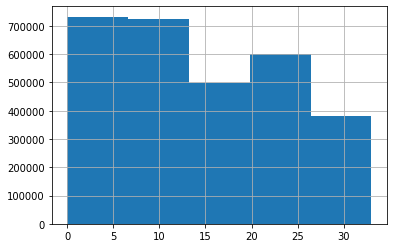

In [ ]:
df_sales['date_block_num'].hist(bins=5)

<Figure size 3168x576 with 0 Axes>

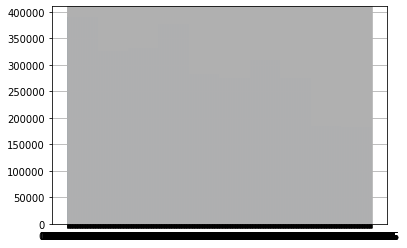

<Figure size 3168x576 with 0 Axes>

In [ ]:
df_sales['date'].hist()
plt.figure(figsize=(44,8))

AxesSubplot(0.1,0.15;0.8x0.75)


<Figure size 1584x576 with 0 Axes>

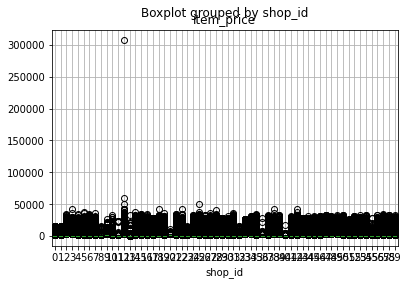

In [ ]:
plt.figure(figsize=(22,8))
print(df_sales.boxplot(column='item_price',by='shop_id'))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


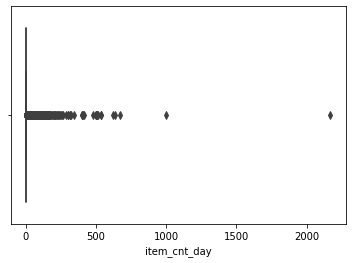

In [ ]:
sns.boxplot(df_sales['item_cnt_day'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


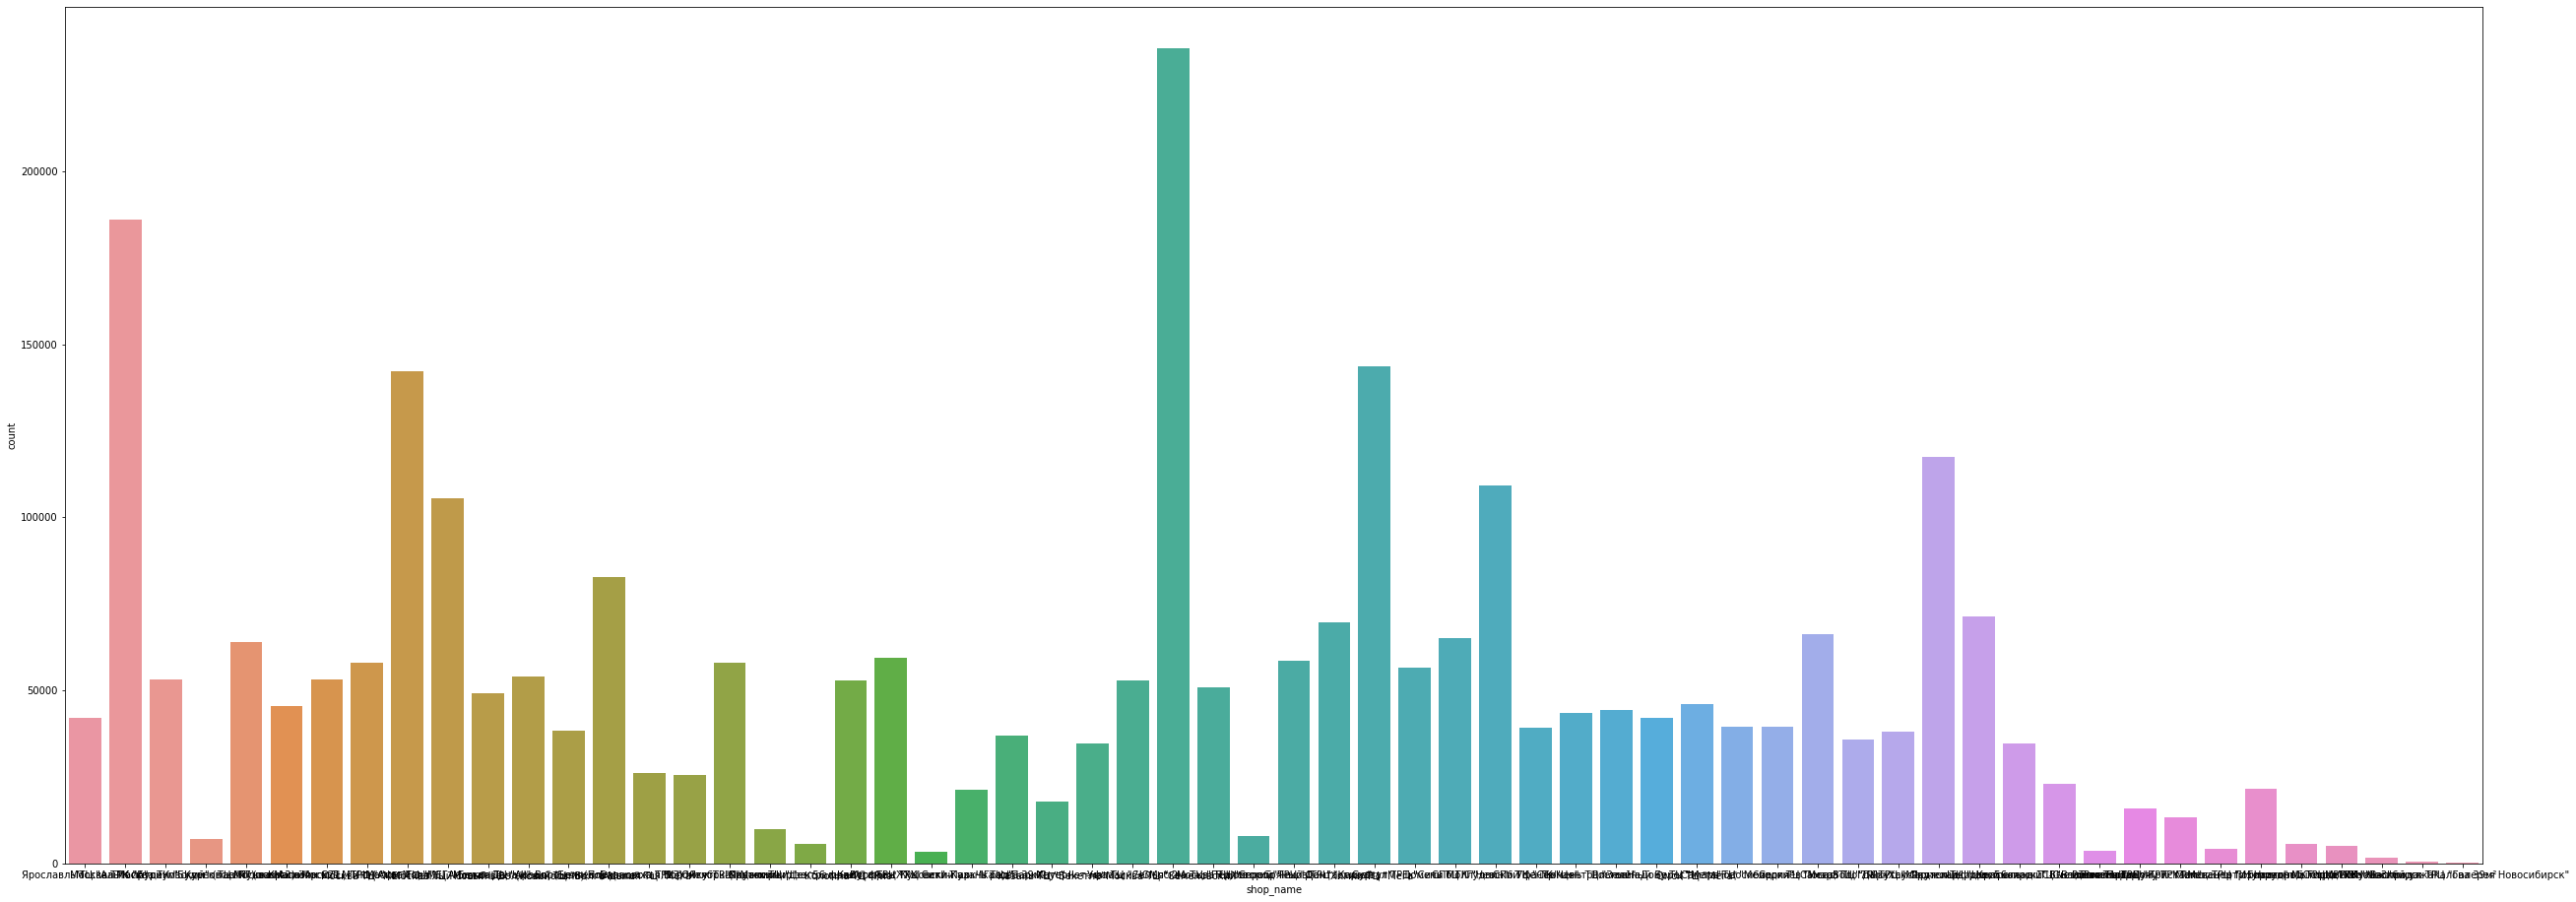

In [ ]:
plt.figure(figsize=(44,16))
sns.countplot(df_sales['shop_name'])

In [ ]:
df_sales = df_sales[df_sales['item_price']>0]
df_sales.shape

(2935848, 10)

In [ ]:
df_sales = df_sales[df_sales['item_cnt_day']>0]
df_sales.shape

(2928492, 10)

In [ ]:
df_sales['item_price'].mean()

890.8532326979881

In [ ]:
monthly_sales = df_sales.groupby(['date_block_num','shop_id','item_id','item_price']).agg({'item_cnt_day':['sum','mean','count']})
monthly_sales

item_cnt_day           
                                                   sum mean count
date_block_num shop_id item_id item_price                        
0              0       32      221.0               6.0  1.5     4
                       33      347.0               3.0  1.0     3
                       35      247.0               1.0  1.0     1
                       43      221.0               1.0  1.0     1
                       51      127.0               1.0  1.0     1
...                                                ...  ...   ...
33             59      22087   119.0               6.0  2.0     3
                       22088   119.0               2.0  1.0     2
                       22091   179.0               1.0  1.0     1
                       22100   629.0               1.0  1.0     1
                       22102   1250.0              1.0  1.0     1

[1737865 rows x 3 columns]

In [ ]:
monthly_sales.columns = ['item_cnt_month','item_cnt_mean','transaction']
monthly_sales.dtypes

item_cnt_month    float64
item_cnt_mean     float64
transaction         int64
dtype: object

In [ ]:
monthly_s = df_sales.join(monthly_sales,)